In [848]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [849]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [850]:
df.shape

(30, 17)

In [851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


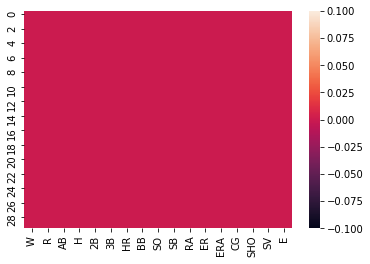

In [852]:
null=df.isnull()                         # no null value as shown in the Heatmap
sns.heatmap(null)

In [853]:
null.sum()                            # columnwise there is no null values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [854]:
df.skew()                               # Skewness is present in few columns(before removing outliers)

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [855]:
collist=df.columns.values
ncol=17
nrows=10 

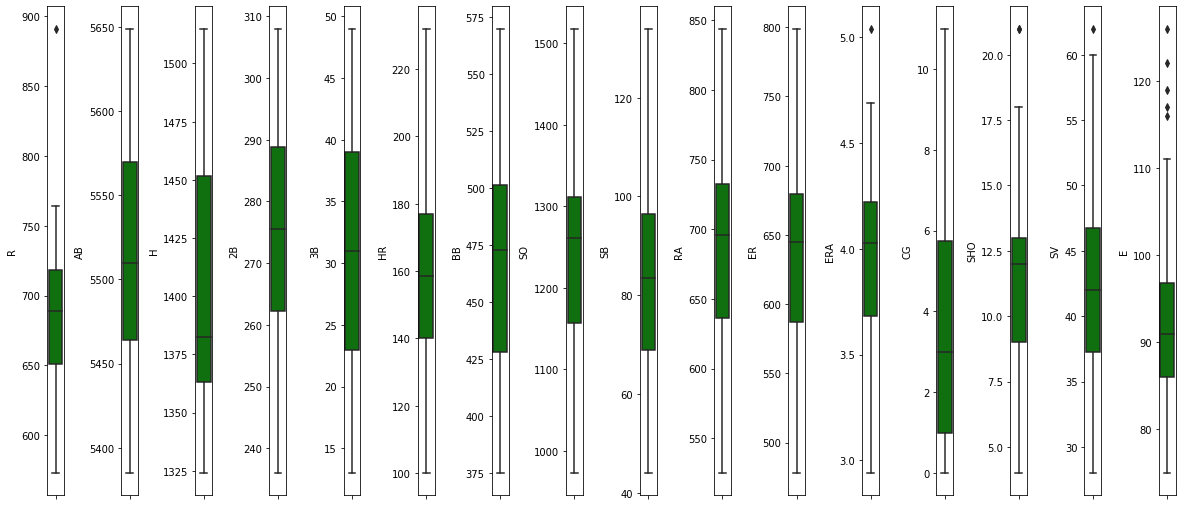

In [856]:
plt.figure(figsize=(17,70))                                      # Outlier is present
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df[collist[i]],color='green',orient='v') 
    plt.tight_layout()

In [857]:
zscore(df)
z=np.abs(zscore(df))                                                 # Removing outliers
np.where(z>3)      
df_new=df[(z<3).all(axis=1)]
df_new 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [858]:
df_new.shape

(29, 17)

In [859]:
df_new.skew()                 # Skewness is still present in few columns after removing outliers  

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [860]:
import numpy as np                                            # Removing Skewness 
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col]) 

In [861]:
df_new.skew()                                                    # Some Skewness is still present

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

In [862]:
import numpy as np                                               # Removing skewness a little further
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(np.log1p(df_new[col]))

In [863]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.731067
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.520097
dtype: float64

In [864]:
df_new.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1.134484,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,1.260706,11.344828,3.778176,0.998166
std,10.384006,45.357040,71.701076,0.001541,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,0.686161,4.185655,0.173374,0.009378
min,63.000000,573.000000,5385.000000,1.132309,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,3.367296,0.983384
25%,74.000000,650.000000,5463.000000,1.133448,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,0.693147,9.000000,3.663562,0.992707
50%,81.000000,689.000000,5511.000000,1.133989,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,1.386294,12.000000,3.784190,0.997191
75%,87.000000,713.000000,5571.000000,1.135046,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,1.791759,13.000000,3.871201,1.000661
max,100.000000,764.000000,5649.000000,1.137552,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,2.484907,21.000000,4.143135,1.017202


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000183BEEFBC88>,
      dtype=object)

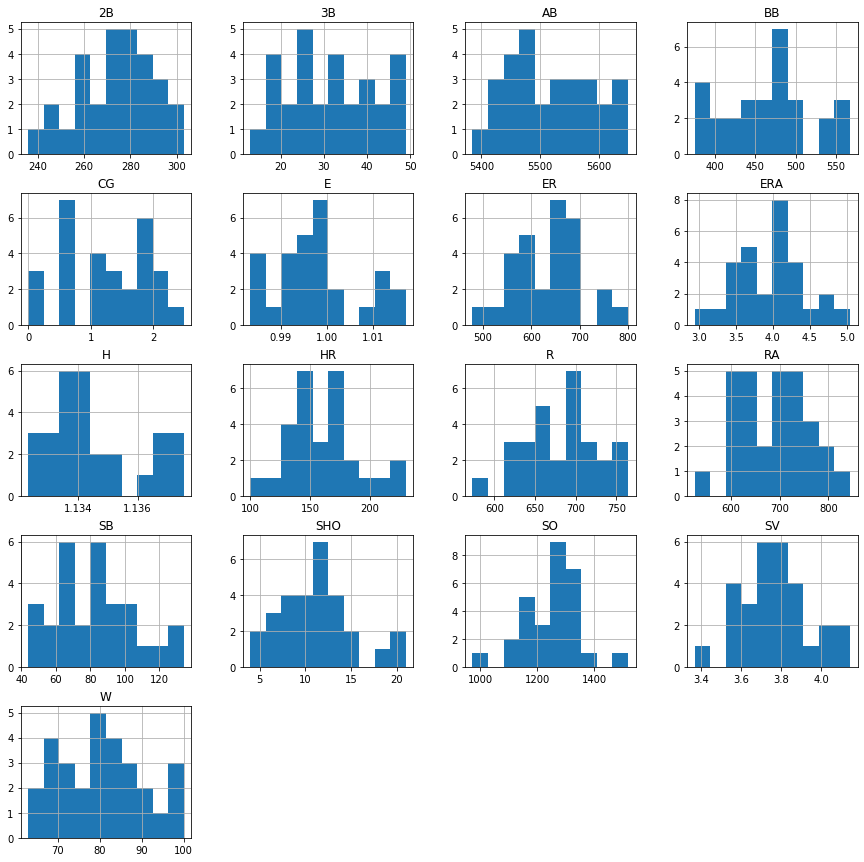

In [865]:
df_new.hist(figsize=(15,15))   

In [866]:
collist=df_new.columns.values
ncol=4
nrows=5

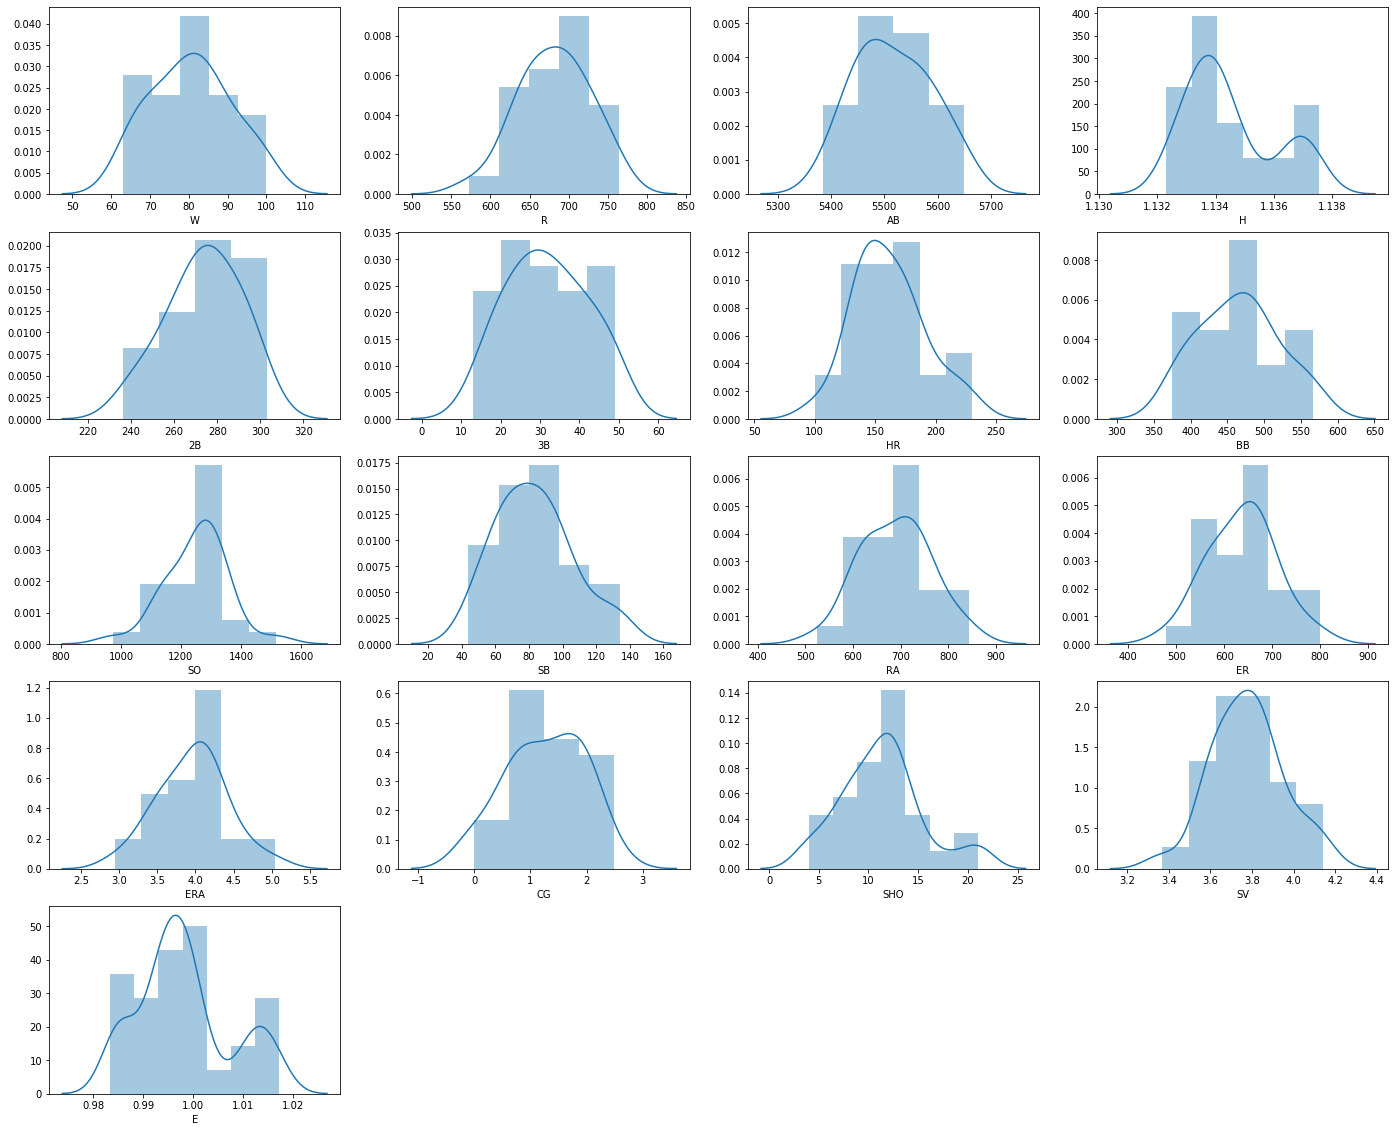

In [867]:
plt.figure(figsize=(24,20))                                 
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.distplot(df_new[collist[i]]) 

In [868]:
df_new.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.021182,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.000122,0.497526,0.756909,-0.075599
R,0.390451,1.000000,0.438022,0.432011,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.164021,-0.085108,0.080162,0.040871
AB,-0.085780,0.438022,1.000000,0.770294,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.056349,-0.198872,-0.142034,0.323257
H,-0.021182,0.432011,0.770294,1.000000,0.527238,0.579347,-0.219270,-0.221682,-0.373521,0.420556,0.243481,0.279854,0.255792,0.062397,-0.138559,-0.099953,-0.013267
2B,0.384886,0.469293,0.490752,0.527238,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.226900,0.084060,0.246600,0.147606
3B,-0.206737,0.134204,0.445604,0.579347,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.002910,-0.058896,-0.259901,0.096093
HR,0.245697,0.586894,-0.064653,-0.219270,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.126024,0.005546,0.100228,-0.180380
BB,0.447513,0.258450,-0.137850,-0.221682,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.448140,0.473922,0.205211,-0.052909
SO,0.156469,0.081158,-0.111243,-0.373521,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.068395,0.231230,0.119732,0.154642
SB,-0.169503,0.075323,0.373674,0.420556,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.042099,-0.104602,-0.193739,0.076923


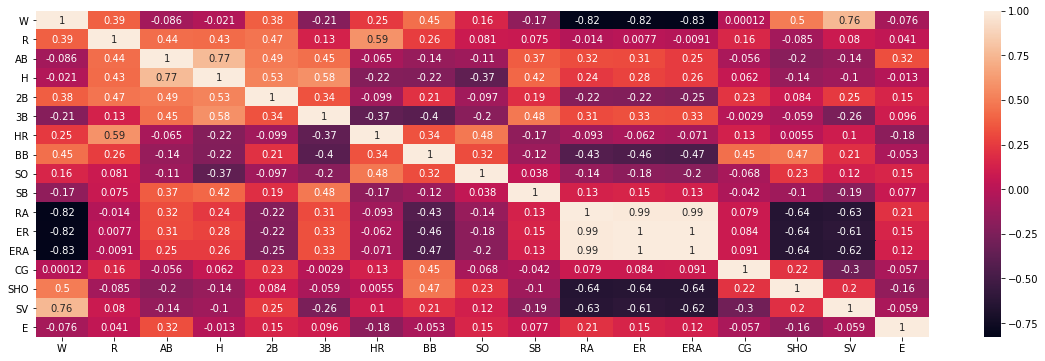

In [869]:
plt.figure(figsize=(20,6))
sns.heatmap(df_new.corr(),annot=True)          # RA, ER and ERA is having negative impact on W(No of predicted wins)

# Univariate analysis

{'bodies': [<matplotlib.collections.PolyCollection at 0x183bfaef848>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x183bfaeecc8>,
 'cmins': <matplotlib.collections.LineCollection at 0x183bfaf4b08>,
 'cbars': <matplotlib.collections.LineCollection at 0x183bfaf4fc8>}

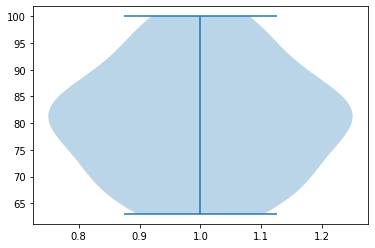

In [870]:
plt.violinplot(df_new['W'])

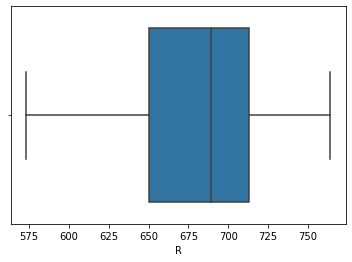

In [871]:
sns.boxplot(df_new['R']) 

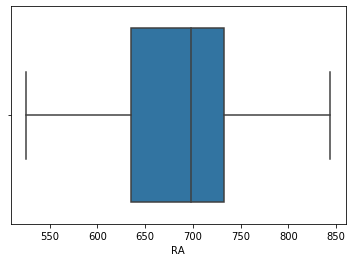

In [872]:
sns.boxplot(df_new['RA'])

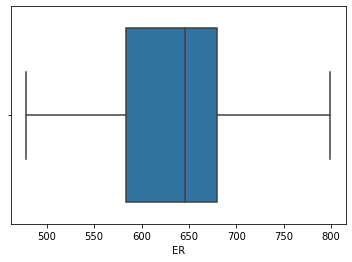

In [873]:
sns.boxplot(df_new['ER'])

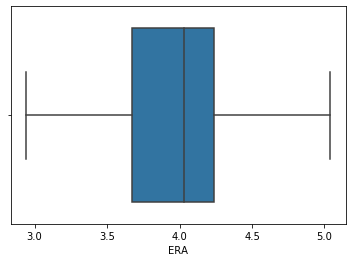

In [874]:
sns.boxplot(df_new['ERA'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x183bffffc88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x183bffe9348>,
 'cmins': <matplotlib.collections.LineCollection at 0x183c0007d08>,
 'cbars': <matplotlib.collections.LineCollection at 0x183c0007c88>}

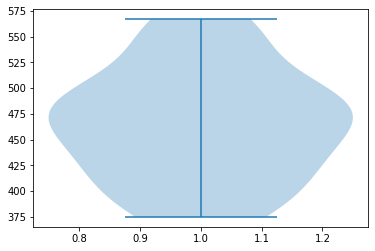

In [875]:
plt.violinplot(df_new['BB'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x183c01743c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x183c011ba48>,
 'cmins': <matplotlib.collections.LineCollection at 0x183c0174cc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x183c0179bc8>}

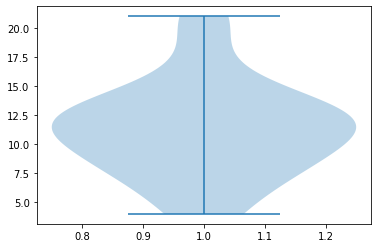

In [876]:
plt.violinplot(df_new['SHO'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x183c0359f88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x183c0345688>,
 'cmins': <matplotlib.collections.LineCollection at 0x183c0363908>,
 'cbars': <matplotlib.collections.LineCollection at 0x183c03657c8>}

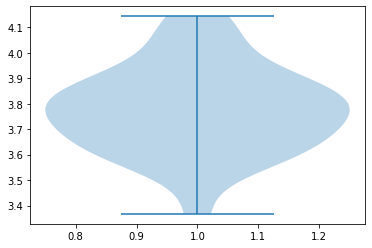

In [877]:
plt.violinplot(df_new['SV'])

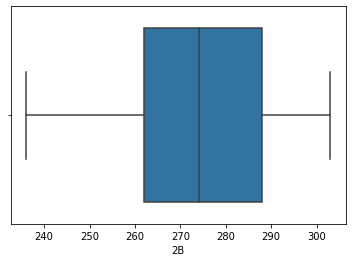

In [878]:
sns.boxplot(df_new['2B'])

# Bivariate analysis of Input Variables with respect to 'W'(No of Predicted Wins)

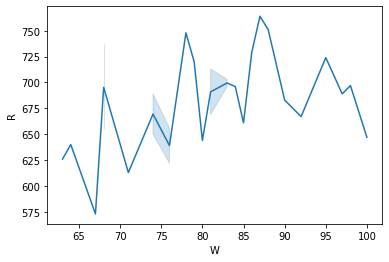

In [879]:
sns.lineplot(x='W', y='R', data=df_new) 

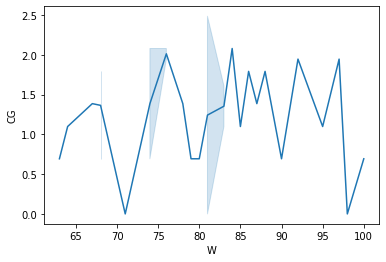

In [880]:
sns.lineplot(x='W', y='CG', data=df_new) 

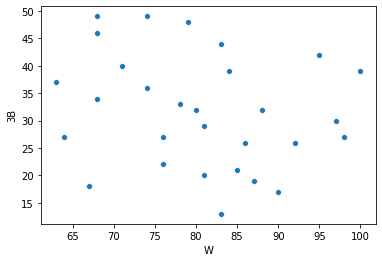

In [881]:
sns.scatterplot(x='W', y='3B', data=df_new) 

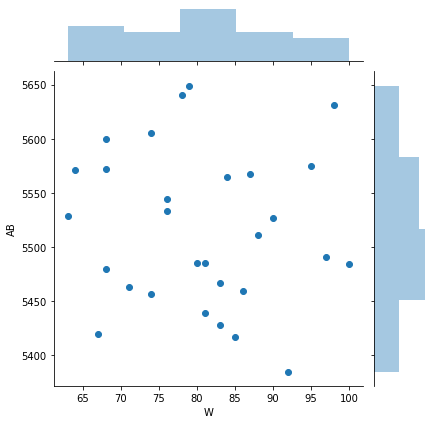

In [882]:
sns.jointplot(x='W', y='AB', data=df_new) 

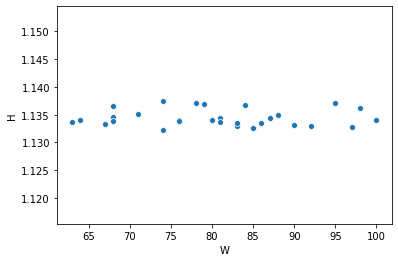

In [883]:
sns.scatterplot(x='W', y='H', data=df_new) 

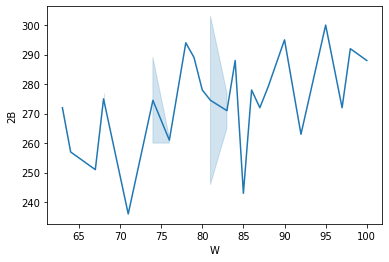

In [884]:
sns.lineplot(x='W', y='2B', data=df_new) 

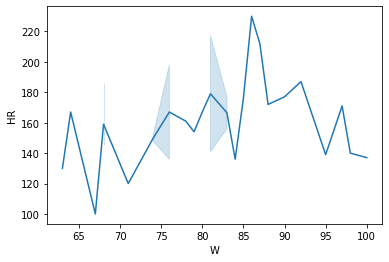

In [885]:
sns.lineplot(x='W', y='HR', data=df_new) 

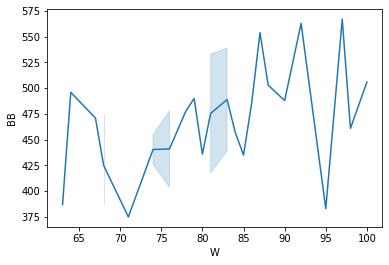

In [886]:
sns.lineplot(x='W', y='BB', data=df_new) 

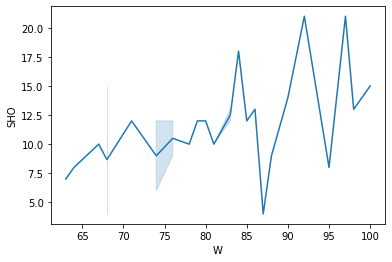

In [887]:
sns.lineplot(x='W', y='SHO', data=df_new) 

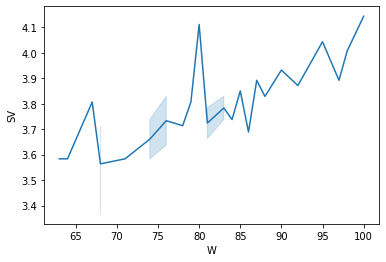

In [888]:
sns.lineplot(x='W', y='SV', data=df_new) 

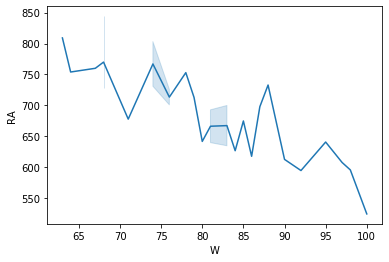

In [889]:
sns.lineplot(x='W', y='RA', data=df_new) 

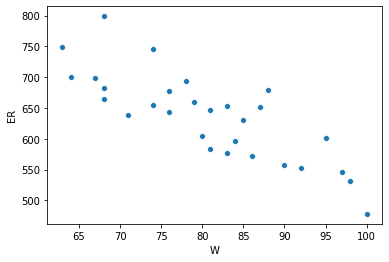

In [890]:
sns.scatterplot(x='W', y='ER', data=df_new) 

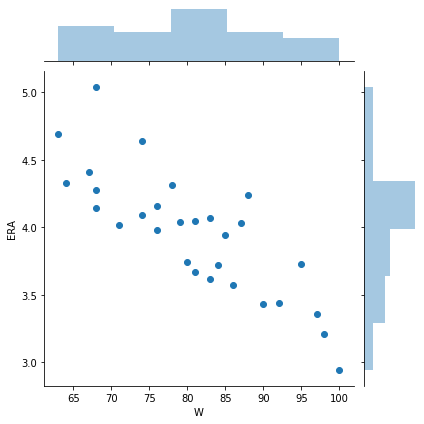

In [891]:
sns.jointplot(x='W', y='ERA', data=df_new) 

# Splitting the data into target and input

In [892]:
df_x=df_new.drop('W',axis=1)
df_x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1.137091,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,0.994244
1,696,5467,1.133043,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,0.992707
2,669,5439,1.134355,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562,0.986960
3,622,5533,1.133961,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586,1.003281
4,689,5605,1.137552,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519,0.992707


In [893]:
df_y=pd.DataFrame(df_new.W)
df_y.head()

,W
0,95
1,83
2,81
3,76
4,74


In [894]:
print(df_x.shape)
print(df_y.shape)

(29, 16)
(29, 1)


In [895]:
#df_n=df_new
#df_n

In [896]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
y = sc.fit_transform(df_y)
y = pd.DataFrame(y,columns=df_y.columns)

In [897]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.721335,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.240415,-0.813262,1.554812,-0.425590
1,0.331147,-0.702831,-0.951607,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.240415,0.159299,0.296229,-0.592334
2,-0.274666,-1.100253,-0.085799,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.815711,-0.326982,-0.672787,-1.216047
3,-1.329231,0.233951,-0.345758,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.214333,-0.570122,-0.825263,0.555158
4,0.174084,1.255894,2.025415,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.214333,0.159299,-1.142637,-0.592334
5,1.856900,0.716535,-0.048909,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.186270,-1.785822,0.667088,-0.028438
6,0.712585,-0.447345,-0.552165,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.869855,-0.326982,0.035297,-1.406928
7,-0.835605,-0.447345,-0.308435,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.841793,0.159299,1.952930,0.123110
8,1.497899,1.752672,1.687287,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.186270,-0.326982,-0.379227,0.270775
9,1.565212,-0.078310,0.352884,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.787648,-0.570122,0.296229,1.682651


In [898]:
y

,W
0,1.416025
1,0.239947
2,0.043934
3,-0.446099
4,-0.642112
5,0.631973
6,0.043934
7,-0.054073
8,-0.250086
9,0.729980


In [899]:
x.skew()

R     -0.215364
AB     0.169573
H      0.731067
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.520097
dtype: float64

In [900]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state         

In [901]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  42 is 0.5505273667827777
r2 score corresponding to  43 is -3.193687633944526
r2 score corresponding to  44 is 0.42061726616245443
r2 score corresponding to  45 is 0.2756394506712636
r2 score corresponding to  46 is 0.7671885184655918
r2 score corresponding to  47 is -0.4944062857172322
r2 score corresponding to  48 is -0.058350184949942374
r2 score corresponding to  49 is -0.41533524725319926
r2 score corresponding to  50 is 0.792058551522876
r2 score corresponding to  51 is 0.6105512028878304
r2 score corresponding to  52 is 0.37042887917885237
r2 score corresponding to  53 is 0.3069142476939122
r2 score corresponding to  54 is -0.07257972518223799
r2 score corresponding to  55 is 0.7082264519194816
r2 score corresponding to  56 is 0.7026654509417181
r2 score corresponding to  57 is 0.687823586866752
r2 score corresponding to  58 is 0.6353322370508117
r2 score corresponding to  59 is 0.6144937051657038
r2 score corresponding to  60 is 0.10644417954956786
r2 

In [902]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,5)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=5)
gknr.fit(x,y) 
gknr.best_params_

#neighbors={"n_neighbors":range(1,5)}
#knr=KNeighborsRegressor()
#gknr = GridSearchCV(knr, neighbors, cv=5)
#gknr.fit(x,y) 
#gknr.best_params_

{'n_neighbors': 4}

In [903]:
knr=KNeighborsRegressor(n_neighbors=3) 
r_state=maxr2_score(knr,x,y) 

r2 score corresponding to  42 is 0.47135717031910807
r2 score corresponding to  43 is 0.45799161654820475
r2 score corresponding to  44 is 0.6074074074074074
r2 score corresponding to  45 is 0.23375451263537916
r2 score corresponding to  46 is 0.4472361809045228
r2 score corresponding to  47 is 0.625293427230047
r2 score corresponding to  48 is 0.3960836671117046
r2 score corresponding to  49 is -0.4550017927572607
r2 score corresponding to  50 is 0.5658508158508158
r2 score corresponding to  51 is 0.680178671133445
r2 score corresponding to  52 is 0.8772663877266388
r2 score corresponding to  53 is 0.30193615907901616
r2 score corresponding to  54 is 0.7289442467378411
r2 score corresponding to  55 is 0.4573996708444108
r2 score corresponding to  56 is 0.6864848755774102
r2 score corresponding to  57 is 0.691358024691358
r2 score corresponding to  58 is 0.27122542869092425
r2 score corresponding to  59 is 0.7146320346320347
r2 score corresponding to  60 is 0.5820271682340648
r2 score 

In [904]:
from sklearn.model_selection import cross_val_score 
print('Mean r2 score for Linear Regression: ',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Linear Regression: ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print('Mean r2 score for KNN Regression: ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for KNN Regression: ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Linear Regression:  0.04089547787216348
Standard Deviation in r2 score for Linear Regression:  0.4426001424987202

Mean r2 score for KNN Regression:  -0.03718454878250499
Standard Deviation in r2 score for KNN Regression:  0.9368216503728789


In [905]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
g_lsreg = GridSearchCV(lsreg, parameters, cv=5)
g_lsreg.fit(x,y)
g_lsreg.best_params_

{'alpha': 0.1}

In [906]:
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to  42 is 0.7377443721717345
r2 score corresponding to  43 is 0.46491211076993366
r2 score corresponding to  44 is 0.7499239328370015
r2 score corresponding to  45 is 0.5272261570797996
r2 score corresponding to  46 is 0.9601291755457839
r2 score corresponding to  47 is 0.9608501714665322
r2 score corresponding to  48 is 0.5105727505125833
r2 score corresponding to  49 is -0.10143298558135161
r2 score corresponding to  50 is 0.8670185424656529
r2 score corresponding to  51 is 0.6461695777071654
r2 score corresponding to  52 is 0.4900880313868258
r2 score corresponding to  53 is 0.7016222656890567
r2 score corresponding to  54 is 0.5466279299311961
r2 score corresponding to  55 is 0.7732683720907665
r2 score corresponding to  56 is 0.6135786352468836
r2 score corresponding to  57 is 0.8312741759959118
r2 score corresponding to  58 is 0.724925045723016
r2 score corresponding to  59 is 0.6041811050191863
r2 score corresponding to  60 is 0.5014798223797654
r2 score c

In [907]:
print('Mean r2 score for Lasso Regression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Lasso Regression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std()) 

Mean r2 score for Lasso Regression:  0.4179745713495553
Standard Deviation in r2 score for Lasso Regression:  0.6633280172470023


In [908]:
from sklearn.linear_model import Ridge
rireg=Ridge()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
g_rireg = GridSearchCV(rireg, parameters, cv=5)
g_rireg.fit(x,y)
g_rireg.best_params_

{'alpha': 1}

In [909]:
rireg=Ridge(alpha=1)
r_state=maxr2_score(rireg,x,y) 

r2 score corresponding to  42 is 0.719746418756599
r2 score corresponding to  43 is 0.19887385735845065
r2 score corresponding to  44 is 0.726426548948845
r2 score corresponding to  45 is 0.5210236387524566
r2 score corresponding to  46 is 0.962763806855534
r2 score corresponding to  47 is 0.9589106730682841
r2 score corresponding to  48 is 0.3559330618289974
r2 score corresponding to  49 is -0.27611665244846373
r2 score corresponding to  50 is 0.8732398653960347
r2 score corresponding to  51 is 0.6957806678983827
r2 score corresponding to  52 is 0.5425696475495252
r2 score corresponding to  53 is 0.6381728751917928
r2 score corresponding to  54 is 0.5778549606951773
r2 score corresponding to  55 is 0.7333690366271082
r2 score corresponding to  56 is 0.5975285289091594
r2 score corresponding to  57 is 0.7739997551271188
r2 score corresponding to  58 is 0.6934477940871698
r2 score corresponding to  59 is 0.576971993112534
r2 score corresponding to  60 is 0.3664447654818813
r2 score corr

In [910]:
print('Mean r2 score for Ridge Regression: ',cross_val_score(rireg,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Ridge Regression: ',cross_val_score(rireg,x,y,cv=5,scoring='r2').std()) 

Mean r2 score for Ridge Regression:  0.3913475064353391
Standard Deviation in r2 score for Ridge Regression:  0.6843363269164044


In [911]:
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import ElasticNet
#neighbors={"n_neighbors":range(1,5)}
#knr=KNeighborsRegressor()
#gknr = GridSearchCV(knr, neighbors, cv=5)
#gknr.fit(x,y) 
#gknr.best_params_

from sklearn.linear_model import ElasticNet
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]} 
g_enr = GridSearchCV(enr, parameters, cv=5)
g_enr.fit(x,y)
g_enr.best_params_

{'alpha': 0.1}

In [912]:
enr=ElasticNet(alpha=0.1)
r_state=maxr2_score(enr,x,y) 

r2 score corresponding to  42 is 0.7661266356793472
r2 score corresponding to  43 is 0.631329144241316
r2 score corresponding to  44 is 0.8471461061367334
r2 score corresponding to  45 is 0.5897390202029777
r2 score corresponding to  46 is 0.9302253508281734
r2 score corresponding to  47 is 0.9412977006925278
r2 score corresponding to  48 is 0.786837896034743
r2 score corresponding to  49 is 0.06863047998797944
r2 score corresponding to  50 is 0.7168231459321341
r2 score corresponding to  51 is 0.6529894776895955
r2 score corresponding to  52 is 0.5354531301423396
r2 score corresponding to  53 is 0.8290641965189749
r2 score corresponding to  54 is 0.7468896881988735
r2 score corresponding to  55 is 0.8070133319059333
r2 score corresponding to  56 is 0.6563709507080149
r2 score corresponding to  57 is 0.8562537967279212
r2 score corresponding to  58 is 0.6627381353615258
r2 score corresponding to  59 is 0.6730054842346662
r2 score corresponding to  60 is 0.5747730386622036
r2 score corr

In [913]:
print('Mean r2 score for ElasticNet Regression: ',cross_val_score(enr,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for ElasticNet Regression: ',cross_val_score(enr,x,y,cv=5,scoring='r2').std()) 

Mean r2 score for ElasticNet Regression:  0.5167921108880729
Standard Deviation in r2 score for ElasticNet Regression:  0.6264699620375326


In [931]:
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import ElasticNet
#neighbors={"n_neighbors":range(1,5)}
#knr=KNeighborsRegressor()
#gknr = GridSearchCV(knr, neighbors, cv=5)
#gknr.fit(x,y) 
#gknr.best_params_

#from sklearn.svm import SVR
#enr=ElasticNet()
#parameters={"alpha":[0.001,0.01,0.1,1]} 
#g_enr = GridSearchCV(enr, parameters, cv=5)
#g_enr.fit(x,y)
#g_enr.best_params_
from sklearn import svm
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":['linear','poly','rbf'], 'C':[1,10]} 
svr= svm.SVR()
g_svr = GridSearchCV(svr, parameters, cv=5)
g_svr.fit(x,y)
g_svr.best_params_ 


{'C': 1, 'kernel': 'linear'}

In [915]:
svr=SVR(kernel='linear',C=1.0)
r_state=maxr2_score(svr,x,y) 

r2 score corresponding to  42 is 0.8107745470255017
r2 score corresponding to  43 is -0.07033273446884802
r2 score corresponding to  44 is 0.6461619190107922
r2 score corresponding to  45 is 0.3868322825031566
r2 score corresponding to  46 is 0.9135873022790368
r2 score corresponding to  47 is 0.9679576865321919
r2 score corresponding to  48 is 0.2508534559257689
r2 score corresponding to  49 is 0.08043481371687644
r2 score corresponding to  50 is 0.8555179490324125
r2 score corresponding to  51 is 0.645680100571268
r2 score corresponding to  52 is 0.50632761383323
r2 score corresponding to  53 is 0.485569109501112
r2 score corresponding to  54 is 0.6442773187152168
r2 score corresponding to  55 is 0.6922748035242853
r2 score corresponding to  56 is 0.545254257734513
r2 score corresponding to  57 is 0.6990559923270778
r2 score corresponding to  58 is 0.660165142598433
r2 score corresponding to  59 is 0.48386671809594284
r2 score corresponding to  60 is 0.37141532001705024
r2 score corr

In [916]:
print('Mean r2 score for Support Vector Regressor: ',cross_val_score(svr,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Support Vector Regressor: ',cross_val_score(svr,x,y,cv=5,scoring='r2').std())  

Mean r2 score for Support Vector Regressor:  0.36154344740947303
Standard Deviation in r2 score for Support Vector Regressor:  0.5994118871718797


In [917]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
parameters= {'criterion':['mse', 'mae'], 'splitter':['best','random'], 'random_state':[0,100]}
gdtr = GridSearchCV(dtr, parameters, cv=5)
gdtr.fit(x,y)
gdtr.best_params_ 

{'criterion': 'mae', 'random_state': 0, 'splitter': 'random'}

In [918]:
dtr=DecisionTreeRegressor(criterion='mae',random_state=0,splitter='random') 
r_state=maxr2_score(dtr,x,y)   

r2 score corresponding to  42 is -0.6055363321799307
r2 score corresponding to  43 is -0.013668671405139499
r2 score corresponding to  44 is -2.293333333333333
r2 score corresponding to  45 is -2.2897111913357397
r2 score corresponding to  46 is 0.5175879396984926
r2 score corresponding to  47 is 0.6514084507042253
r2 score corresponding to  48 is -1.2590120160213618
r2 score corresponding to  49 is -3.0767300107565436
r2 score corresponding to  50 is -0.05681818181818188
r2 score corresponding to  51 is -0.1678391959798995
r2 score corresponding to  52 is 0.5768081291093845
r2 score corresponding to  53 is -0.04552590266875978
r2 score corresponding to  54 is 0.33807829181494664
r2 score corresponding to  55 is -2.133308013672617
r2 score corresponding to  56 is 0.21949038891372352
r2 score corresponding to  57 is 0.7635933806146572
r2 score corresponding to  58 is -0.10288582183186956
r2 score corresponding to  59 is -0.25298701298701265
r2 score corresponding to  60 is 0.12624679395

In [919]:
print('Mean r2 score for Decision Tree Regressor: ',cross_val_score(dtr,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Decision Tree Regressor: ',cross_val_score(dtr,x,y,cv=5,scoring='r2').std())  

Mean r2 score for Decision Tree Regressor:  -0.5337024398123127
Standard Deviation in r2 score for Decision Tree Regressor:  1.143038711389437


In [920]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
parameters= {'criterion':['mse', 'mae'], 'random_state':[0,100]} 
grfr = GridSearchCV(rfr, parameters, cv=5)
grfr.fit(x,y)
grfr.best_params_ 

{'criterion': 'mae', 'random_state': 0}

In [921]:
rfr=RandomForestRegressor(criterion='mae',random_state=0) 
r_state=maxr2_score(rfr,x,y)   

r2 score corresponding to  42 is 0.5485480968858134
r2 score corresponding to  43 is 0.2790650628758883
r2 score corresponding to  44 is 0.5467123333333332
r2 score corresponding to  45 is 0.09495279783393507
r2 score corresponding to  46 is 0.8285600730927363
r2 score corresponding to  47 is 0.7282751320422538
r2 score corresponding to  48 is 0.8036727303070762
r2 score corresponding to  49 is -0.6817165292219434
r2 score corresponding to  50 is 0.2843995629370628
r2 score corresponding to  51 is 0.5538791959798995
r2 score corresponding to  52 is 0.6793356843992829
r2 score corresponding to  53 is 0.6672051491365776
r2 score corresponding to  54 is 0.5627195729537369
r2 score corresponding to  55 is 0.5516375237371818
r2 score corresponding to  56 is 0.2309622708985244
r2 score corresponding to  57 is 0.6318602836879434
r2 score corresponding to  58 is 0.21935652446675036
r2 score corresponding to  59 is 0.4105204155844152
r2 score corresponding to  60 is 0.3658314619549733
r2 score 

In [922]:
print('Mean r2 score for Random Forest Regressor: ',cross_val_score(rfr,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Random Forest Regressor: ',cross_val_score(rfr,x,y,cv=5,scoring='r2').std())  

Mean r2 score for Random Forest Regressor:  -0.6175941542352098
Standard Deviation in r2 score for Random Forest Regressor:  2.270259866801926


In [923]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.ensemble import AdaBoostRegressor
ada_reg= AdaBoostRegressor()
parameters= {'learning_rate':[0.001,0.01,0.1,1], 'n_estimators':[10,20,30,40,50,60,70,80,90,100],'base_estimator':[lsreg,svr,enr,rireg]} 
gada_reg = GridSearchCV(ada_reg, parameters, cv=5)                                   
gada_reg.fit(x,y)             
gada_reg.best_params_  

{'base_estimator': Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'learning_rate': 0.1,
 'n_estimators': 20}

In [924]:
ada_reg=AdaBoostRegressor(learning_rate=1,n_estimators=60,base_estimator=enr) 
r_state=maxr2_score(ada_reg,x,y) 

r2 score corresponding to  42 is 0.7067155474058593
r2 score corresponding to  43 is 0.6492011023377702
r2 score corresponding to  44 is 0.68379064669112
r2 score corresponding to  45 is 0.6008531568394301
r2 score corresponding to  46 is 0.9174520024736125
r2 score corresponding to  47 is 0.9122220002615604
r2 score corresponding to  48 is 0.6952816394054377
r2 score corresponding to  49 is 0.09200638928297622
r2 score corresponding to  50 is 0.6958595128573655
r2 score corresponding to  51 is 0.5708549651136132
r2 score corresponding to  52 is 0.5553357484731039
r2 score corresponding to  53 is 0.8202698616993438
r2 score corresponding to  54 is 0.7610549038121688
r2 score corresponding to  55 is 0.8082518261863662
r2 score corresponding to  56 is 0.628191323087851
r2 score corresponding to  57 is 0.84579075259572
r2 score corresponding to  58 is 0.6875264477278265
r2 score corresponding to  59 is 0.760780092802211
r2 score corresponding to  60 is 0.5136707988082316
r2 score correspo

In [925]:
print('Mean r2 score for AdaBoostRegressor: ',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for AdaBoostRegressor: ',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())  

Mean r2 score for AdaBoostRegressor:  0.35703686806251983
Standard Deviation in r2 score for AdaBoostRegressor:  0.7586615468252844


In [926]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters= {'learning_rate':[0.001,0.01,0.1,1], 'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
g_gbr = GridSearchCV(gbr, parameters, cv=5)
g_gbr.fit(x,y)
g_gbr.best_params_

{'learning_rate': 0.01, 'n_estimators': 30}

In [927]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=60) 
r_state=maxr2_score(gbr,x,y) 

r2 score corresponding to  42 is 0.39313608083311347
r2 score corresponding to  43 is -0.4824037808231203
r2 score corresponding to  44 is 0.28678833475539545
r2 score corresponding to  45 is -0.3868237761370934
r2 score corresponding to  46 is 0.6333153577772268
r2 score corresponding to  47 is 0.790258122730466
r2 score corresponding to  48 is 0.6542172905091763
r2 score corresponding to  49 is -0.5996233451900252
r2 score corresponding to  50 is 0.1186129653401452
r2 score corresponding to  51 is 0.09926166715393792
r2 score corresponding to  52 is -0.12047847903927078
r2 score corresponding to  53 is 0.3019647054061809
r2 score corresponding to  54 is 0.45041963515039773
r2 score corresponding to  55 is 0.6217330864137425
r2 score corresponding to  56 is -0.24104678604749585
r2 score corresponding to  57 is 0.5095391953961235
r2 score corresponding to  58 is 0.152428517701797
r2 score corresponding to  59 is 0.09559439447288876
r2 score corresponding to  60 is 0.29855358854814107
r

In [928]:
print('Mean r2 score for GradientBoostingRegressor: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for GradientBoostingRegressor: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())  

Mean r2 score for GradientBoostingRegressor:  -1.3821161615144204
Standard Deviation in r2 score for GradientBoostingRegressor:  3.747113637710554


In [929]:
# Here Ridge Regression is working best with r2_score of 0.9657
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 75, test_size=0.20)
rireg=Ridge()
rireg.fit(x_train,y_train)
y_pred=rireg.predict(x_test) 

In [930]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,y_pred)))  
print('r2_score is: ',r2_score(y_test,y_pred))

RMSE is:  0.21081861525021056
r2_score is:  0.9657604943516955


In [932]:
from sklearn.externals import joblib
joblib.dump(rireg, 'rireg_baseball.pkl')

['rireg_baseball.pkl']